# Reconocimiento de Patrones
[Curso de Reconocimiento de Patrones]

Departamento Electrónica

Universidad Popular del Cesar

José Ramón Iglesias
---

# Ejemplos de Visualización

En estos ejemplos se muestra distintas formas de visualizar los datos.




## Setup de librerías

# Setup inicial

Liberías necesarias para que funcione el algoritmo.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
from   sklearn.metrics import confusion_matrix, accuracy_score
from   sklearn.model_selection import train_test_split                      
import seaborn as sns
import scipy.stats as st


## Carga de base de datos

En este ejemplo, usaremos dos bases de datos, la primera `F40` que consiste en una selección de las mejores 40 características usadas en un problema de detección de espinas de salmones (2 clases), y la segunda `F2` que consiste en datos simulados con distribuciones Gaussianas de 2 características y 2 clases. En estos ejemplos, no se realiza ningún algoritmo de selección o normalización de datos.

In [ ]:
!wget https://www.dropbox.com/s/2nu0g4ubsv53ed3/F40.zip?dl=0
!unzip F40

--2021-05-20 16:27:26--  https://www.dropbox.com/s/yludnxvcpbm8tb5/F40.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/yludnxvcpbm8tb5/F40.zip [following]
--2021-05-20 16:27:27--  https://www.dropbox.com/s/raw/yludnxvcpbm8tb5/F40.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7d472b996cbefbd548d622c789.dl.dropboxusercontent.com/cd/0/inline/BO0YIOSp2UZyg3nlSWKfyr6j2jaT56Qea-UoY9eo8Jfj2ZyGskoxVgm61A-uXm7z_r7R3YCgX6IntkNrR59dDATKlosYr63fvrvc-e5iRFUZVPlG6mV4jij_mcL1ZOAQxJgqL34yKH8e_eC_J2qz7j56/file# [following]
--2021-05-20 16:27:27--  https://uc7d472b996cbefbd548d622c789.dl.dropboxusercontent.com/cd/0/inline/BO0YIOSp2UZyg3nlSWKfyr6j2jaT56Qea-UoY9eo8Jfj2ZyGskoxVgm61A-uXm7z_r7R3YCgX6IntkNrR59dDATKlosYr63fvrvc-e5iR

In [ ]:
!wget https://www.dropbox.com/s/4knnagipqowhn7s/F2.zip?dl=0
!unzip F2

--2021-05-20 16:27:32--  https://www.dropbox.com/s/47a4uvq7fh0os01/F2.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/47a4uvq7fh0os01/F2.zip [following]
--2021-05-20 16:27:32--  https://www.dropbox.com/s/raw/47a4uvq7fh0os01/F2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca5823d4d44fee177f41923b168.dl.dropboxusercontent.com/cd/0/inline/BO3ZnyIgoV-jJm6CZ7Szm7BEvG9oMZIWksDOY1D81ocTOjlztbX-jZrULO6sOIj1S3S0AeAdz81Qjhxqt0VU9XM4oysBdvqyV6IOT_JuBiuAPDRWN4ulSQd8a7IbxKtcJNm2BdH4NmDwoj5jx9va35wP/file# [following]
--2021-05-20 16:27:32--  https://uca5823d4d44fee177f41923b168.dl.dropboxusercontent.com/cd/0/inline/BO3ZnyIgoV-jJm6CZ7Szm7BEvG9oMZIWksDOY1D81ocTOjlztbX-jZrULO6sOIj1S3S0AeAdz81Qjhxqt0VU9XM4oysBdvqyV6IOT_JuBiuA

## Funciones necesarias

In [ ]:
def load_features(prefix):
    Xtrain  = np.load(prefix+'_Xtrain.npy')            # training samples
    Xtest = np.load(prefix+'_Xtest.npy')               # testing samples
    ytrain  = np.ravel(np.load(prefix+'_dtrain.npy'))  # training labels
    ytrain = ytrain.astype(int)
    ytest = np.ravel(np.load(prefix+'_dtest.npy'))     # testing labels
    ytest = ytest.astype(int)
    print('Training data: '+str(Xtrain.shape[0]) +' samples with '+str(Xtrain.shape[1]) +' features')
    print(' Testing data: '+str(Xtest.shape[0])+' samples with '+str(Xtest.shape[1])+' features')
    print('      Classes: '+str(int(np.min(ytrain)))+'...'+str(int(np.max(ytrain))))
    return Xtrain,ytrain,Xtest,ytest

def print_confusion(dt,ds,show_heatmap=0,Cnorm=1):
    # dt - true, ds - predicted
    C   = confusion_matrix(dt,ds) 
    print('Confusion Matrix:')
    print(C)
    acc = accuracy_score(dt,ds) 
    acc_st = "{:.2f}".format(acc*100)
    print('Accuracy = '+str(acc_st))
    if show_heatmap:
      sns.heatmap(C/Cnorm, annot=True, cbar=None, cmap="Blues")
      plt.title("Confusion Matrix: Acc ="+acc_st)
      plt.tight_layout()
      plt.ylabel("True Class"), plt.xlabel("Predicted Class")
      plt.show()

def plot_decision_lines(clf,X,show=0,decisionline=1):
    # based on example of https://scikit-learn.org
    h = 0.05
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if show==1:
      plt.figure(figsize=(12,8))
    if decisionline == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Blues, alpha=0.6)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if show==1:
        plt.show()

def show_clf_results(clf,X,d,Xt,dt,d0,ds,st,decisionline=1):
    gs = gridspec.GridSpec(1, 2)
    fig = plt.figure(figsize=(18, 6))
    print('Training:')
    acc = accuracy_score(d,d0) 
    accst = f'Acc = {acc:.4f}'    
    ax = plt.subplot(gs[0,0])
    print_confusion(d,d0)                                         # confusion matrix in training
    plot_decision_lines(clf,X,show=0,decisionline=decisionline)   # decision lines
    plot_features(X,d,st+' - Training: '+accst,show=0)            # feature space in training   
    ax = plt.subplot(gs[0,1])
    print('Testing:')
    acc = accuracy_score(ds,dt) 
    accst = f'Acc = {acc:.4f}'    
    print_confusion(dt,ds)                                        # confusion matrix in testing
    plot_decision_lines(clf,X,show=0,decisionline=decisionline)   # decision lines
    plot_features(Xt,dt,st+' - Testing: '+accst,show=0)           # feature space in testing

def plot_features(X,d,st,show=1):
    dmin = int(np.min(d)) 
    dmax = int(np.max(d)) 
    if show==1:
      plt.figure(figsize=(12,8))
    for j in range(dmin,dmax+1):
        plt.scatter(X[d==j,0],X[d==j,1],label=str(j),s=27)
    plt.grid(True)
    plt.legend()
    plt.xlabel('$x_1$',fontsize=14)
    plt.ylabel('$x_2$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()

def plot_features3(X,d,st,show=1,view=(30,60)):
    dmin = int(np.min(d)) 
    dmax = int(np.max(d)) 
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    for j in range(dmin,dmax+1):
        ax.scatter(X[d==j,0],X[d==j,1],X[d==j,2],label=str(j),s=27)
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('$x_1$',fontsize=14)
    ax.set_ylabel('$x_2$',fontsize=14)
    ax.set_zlabel('$x_3$',fontsize=14)
    plt.title('Feature Space - '+st,fontsize=14)
    if show==1:
        plt.show()


# Setup de Datos

## Base de Datos F40

`F40` consiste en una selección de las mejores 40 características usadas en un problema de detección de espinas de salmones (2 clases). Para la visualización usaremos todos los datos disponibles, es decir 264 muestras, con 40 características.

In [ ]:
Xtrain40,ytrain,Xtest40,ytest   = load_features('F40/F40')   # load training and testing data

X40 = np.concatenate((Xtrain40,Xtest40),axis=0)
y = np.concatenate((ytrain,ytest),axis=0)
print('   Concatened: '+str(X40.shape[0]) +' samples with '+str(X40.shape[1]) +' features')


Training data: 211 samples with 40 features
 Testing data: 53 samples with 40 features
      Classes: 1...2
   Concatened: 264 samples with 40 features


## Visualización de 5 Características

Las 40 características han sido ordenadas por relevancia (fueron seleccionadas usando SFS). Mostramos a continuación las 5 primeras.

5 caracteristicas escogidas.
          x_1       x_2       x_3       x_4       x_5  clases
0    0.107065  0.946153  0.699273  0.587316  0.953015       1
1    0.169599  0.923520  0.592226  0.707888  0.893520       1
2    0.224238  0.984150  0.386649  0.878525  0.907532       1
3    0.074827  0.882374  0.825545  0.484049  0.827650       1
4    0.140159  0.926573  0.679080  0.640670  0.871661       1
..        ...       ...       ...       ...       ...     ...
259  0.245619  0.656019  0.357384  0.852396  0.582982       2
260  0.357365  0.850619  0.118935  0.985160  0.863702       2
261  0.332517  0.858322  0.282100  0.936357  0.646018       2
262  0.007685 -0.099073  0.770384  0.571360  0.051998       2
263  0.338418  0.604882  0.211134  0.953886  0.361086       2

[264 rows x 6 columns]


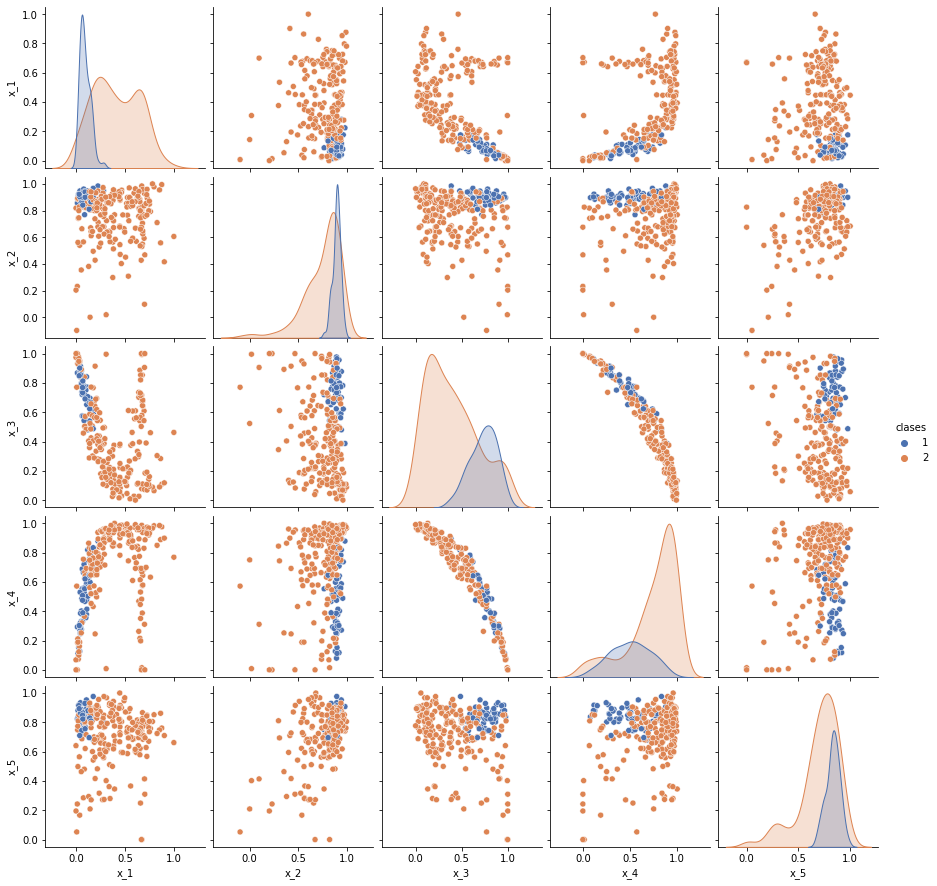

In [ ]:
X5 = X40[:,0:5] # Se escogen las primeras 5 características

print(str(X5.shape[1])+' caracteristicas escogidas.')

df1 = pd.DataFrame(X5, columns = ['x_1','x_2','x_3','x_4','x_5'])
df2 = pd.DataFrame(y,columns = ['clases'])
df = pd.concat([df1, df2], axis=1)
print(df)

sns.pairplot(df,hue='clases',palette="deep")

## Visualización de 3 Características

Gráficos 3D para las primeras 3 características.

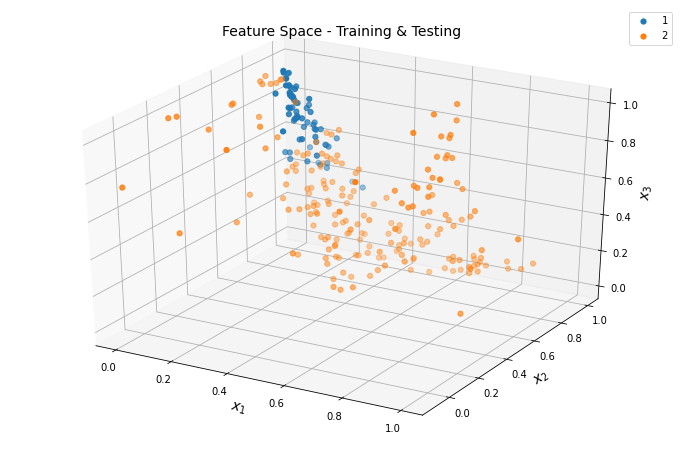

In [ ]:
X3 = X40[:,0:3] # Se escogen las primeras 3 características

plot_features3(X3,y,'Training & Testing')

## Visualización de 2 Características
Se escogen las 2 primeras.

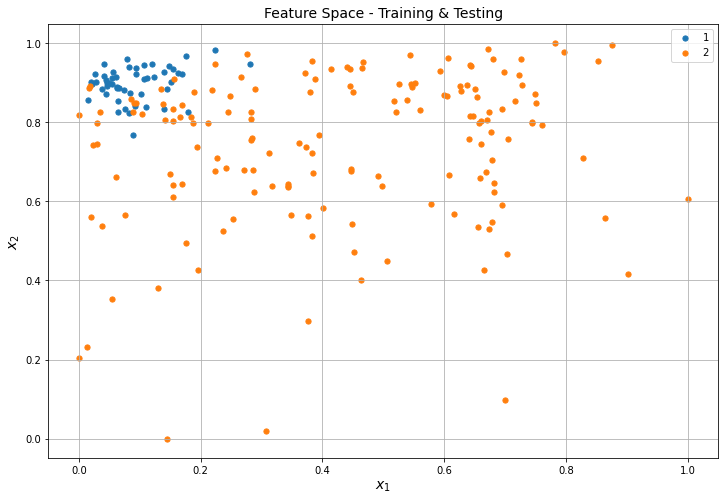

In [ ]:
X2 = Xtrain40[:,0:2]

plot_features(X2,ytrain,'Training & Testing')

## Base de Datos F2

`F2` consiste en datos simulados con distribuciones Gaussianas de 2 características y 2 clases. 

# Visualización de 2 Características

Para la visualización usaremos todos los datos disponibles, es decir 1200 muestras, con 2 características (y 2 clases) para mostrar distintas visualizaciones.

In [ ]:
Xtrain,ytrain,Xtest,ytest   = load_features('F2/F2')   # load training and testing data
X = np.concatenate((Xtrain,Xtest),axis=0)
y = np.concatenate((ytrain,ytest),axis=0)
print('   Concatened: '+str(X.shape[0]) +' samples with '+str(X.shape[1]) +' features')


Training data: 800 samples with 2 features
 Testing data: 400 samples with 2 features
      Classes: 0...1
   Concatened: 1200 samples with 2 features


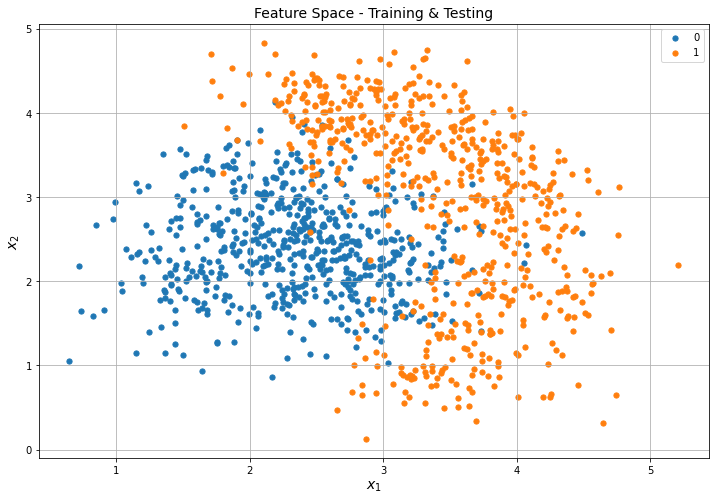

In [ ]:
plot_features(X,y,'Training & Testing')

           x_1       x_2  clases
0     1.468930  1.880148       0
1     2.546401  2.657123       0
2     1.194646  2.050108       0
3     1.887354  2.997270       0
4     2.492454  1.820105       0
...        ...       ...     ...
1195  3.287782  3.733354       1
1196  3.196743  3.589584       1
1197  4.561013  2.076128       1
1198  3.452913  3.574287       1
1199  2.562258  4.314917       1

[1200 rows x 3 columns]


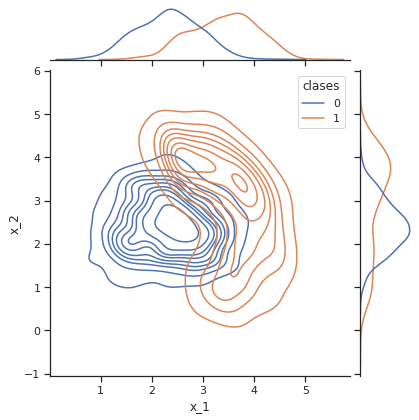

In [ ]:
sns.set_theme(style="ticks")
df1 = pd.DataFrame(X, columns = ['x_1','x_2'])
df2 = pd.DataFrame(y,columns = ['clases'])
df = pd.concat([df1, df2], axis=1)
print(df)
sns.jointplot(data=df,x="x_1", y="x_2", hue="clases",kind="kde",palette="deep")

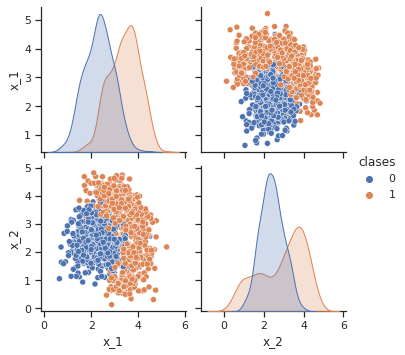

In [ ]:
sns.pairplot(df,hue='clases',palette="deep")

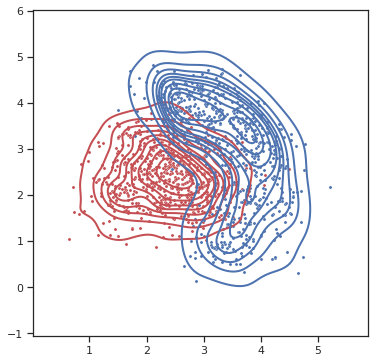

In [ ]:
ymin = int(np.min(y)) 
ymax = int(np.max(y)) 
f, ax = plt.subplots(figsize=(6, 6))

cm = ["Reds","mako"]
cb = ['r','b']

for j in range(ymin,ymax+1):
    x_1 = X[y==j,0]
    x_2 = X[y==j,1]
    sns.scatterplot(x=x_1, y=x_2, s=10, color=cb[j])
    sns.kdeplot(x=x_1, y=x_2, levels=10, color=cb[j], linewidths=2)


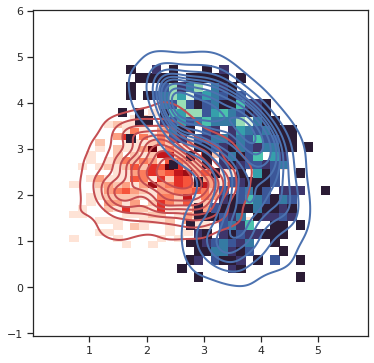

In [ ]:
ymin = int(np.min(y)) 
ymax = int(np.max(y)) 
f, ax = plt.subplots(figsize=(6, 6))

cm = ["Reds","mako"]
cb = ['r','b']

for j in range(ymin,ymax+1):
    x_1 = X[y==j,0]
    x_2 = X[y==j,1]
    sns.histplot(x=x_1, y=x_2, bins=25, pthresh=-1, cmap=cm[j])
    sns.kdeplot(x=x_1, y=x_2, levels=10, color=cb[j], linewidths=2)
    

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Se

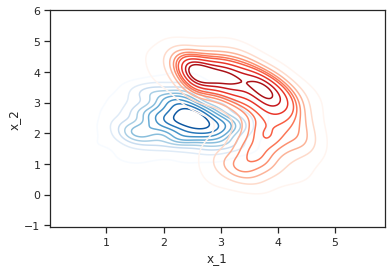

In [ ]:
ymin = int(np.min(y)) 
ymax = int(np.max(y)) 

cm = ['Blues','Reds','Greens']
for j in range(ymin,ymax+1):
  a1 = df.query("clases=="+str(j))
  sns.kdeplot(a1['x_1'],a1['x_2'], shade=False,cmap=cm[j], shade_lowest=False)


Text(0.5, 1.0, 'Ambas clases juntas')

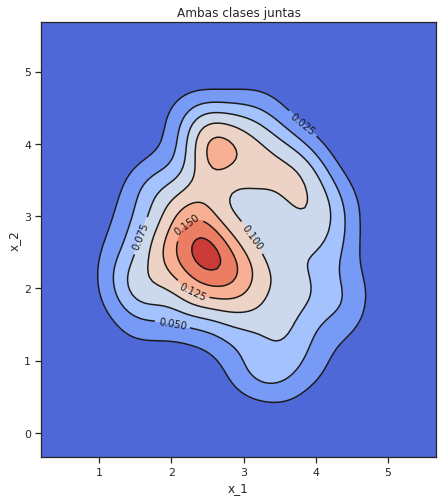

In [ ]:
# Extract x and y
x_1 = X[:, 0]
x_2 = X[:, 1]
# Define the borders
delta1 = (max(x_1) - min(x_1))/10
delta2 = (max(x_2) - min(x_2))/10
xmin1 = min(x_1) - delta1
xmax1 = max(x_1) + delta1
xmin2 = min(x_2) - delta2
xmax2 = max(x_1) + delta2
# Create meshgrid
xx1, xx2 = np.mgrid[xmin1:xmax1:100j, xmin2:xmax2:100j]

positions = np.vstack([xx1.ravel(), xx2.ravel()])
values = np.vstack([x_1, x_2])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx1.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin1, xmax1)
ax.set_ylim(xmin2, xmax2)
cfset = ax.contourf(xx1, xx2, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin1, xmax1, xmin2, xmax2])
cset = ax.contour(xx1, xx2, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
plt.title('Ambas clases juntas')

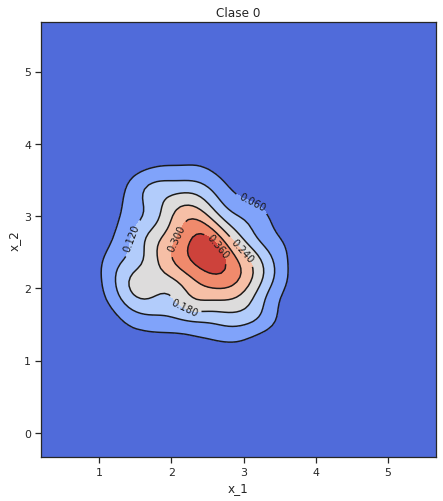

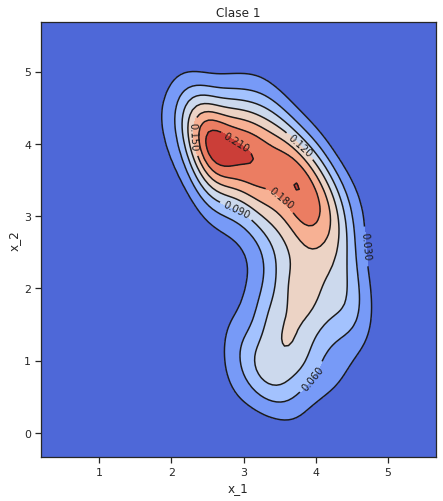

In [ ]:
# Extract x_1 and x_2
x_1 = X[:, 0]
x_2 = X[:, 1]
# Define the borders
delta1 = (max(x_1) - min(x_1))/10
delta2 = (max(x_2) - min(x_2))/10
xmin1 = min(x_1) - delta1
xmax1 = max(x_1) + delta1
xmin2 = min(x_2) - delta2
xmax2 = max(x_1) + delta2
# Create meshgrid
xx1, xx2 = np.mgrid[xmin1:xmax1:100j, xmin2:xmax2:100j]

positions = np.vstack([xx1.ravel(), xx2.ravel()])

for j in range(2):

  x_1 = X[y==j, 0]
  x_2 = X[y==j, 1]
  values = np.vstack([x_1, x_2])
  kernel = st.gaussian_kde(values)
  f = np.reshape(kernel(positions).T, xx1.shape)

  fig = plt.figure(figsize=(8,8))
  ax = fig.gca()
  ax.set_xlim(xmin1, xmax1)
  ax.set_ylim(xmin2, xmax2)
  cfset = ax.contourf(xx1, xx2, f, cmap='coolwarm')
  ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin1, xmax1, xmin2, xmax2])
  cset = ax.contour(xx1, xx2, f, colors='k')
  ax.clabel(cset, inline=1, fontsize=10)
  ax.set_xlabel('x_1')
  ax.set_ylabel('x_2')
  plt.title('Clase '+str(j))

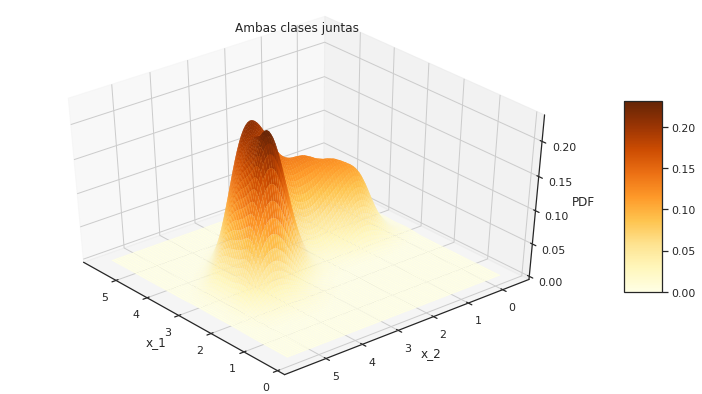

In [ ]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx1, xx2, f, rstride=1, cstride=1, cmap='YlOrBr', edgecolor='none')
# ver más colores de cmap en https://seaborn.pydata.org/tutorial/color_palettes.html
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('PDF')
ax.set_title('Ambas clases juntas')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(40, 140)

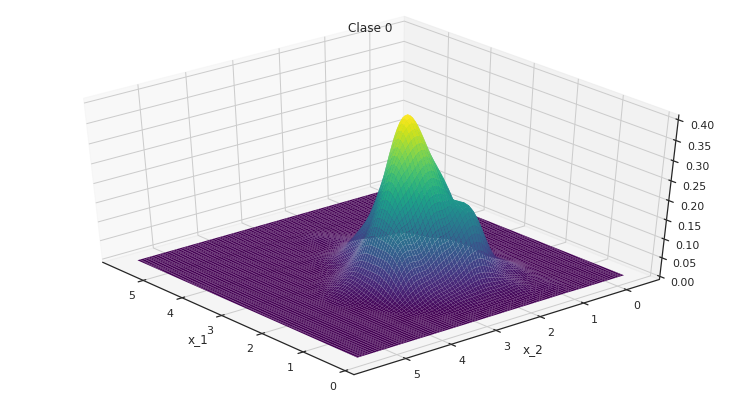

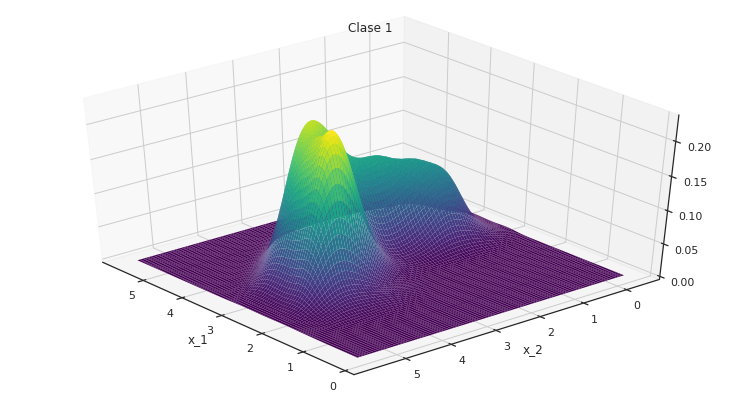

In [ ]:

ymin = int(np.min(y)) 
ymax = int(np.max(y)) 


for j in range(ymin,ymax+1):
    x_1 = X[y==j,0]
    x_2 = X[y==j,1]
    values = np.vstack([x_1, x_2])
    kernel = st.gaussian_kde(values)
    fig = plt.figure(figsize=(13, 7))
    ax = plt.axes(projection='3d')
    f = np.reshape(kernel(positions).T, xx1.shape)    
    surf = ax.plot_surface(xx1, xx2, f, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
    # ver más colores de cmap en https://seaborn.pydata.org/tutorial/color_palettes.html
    ax.view_init(40, 140)    
    plt.title('Clase '+str(j))   
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    

## Visualización de 1 Característica

           x_1  clases
0     1.468930       0
1     2.546401       0
2     1.194646       0
3     1.887354       0
4     2.492454       0
...        ...     ...
1195  3.287782       1
1196  3.196743       1
1197  4.561013       1
1198  3.452913       1
1199  2.562258       1

[1200 rows x 2 columns]


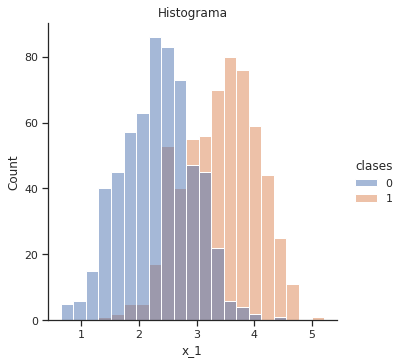

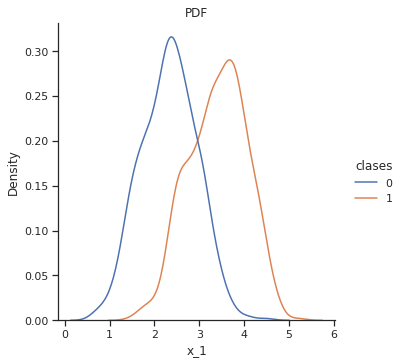

In [ ]:
X1 = X[:,0]
df1 = pd.DataFrame(X1, columns = ['x_1'])
df2 = pd.DataFrame(y,columns = ['clases'])
df = pd.concat([df1, df2], axis=1)
print(df)
# Histogram
sns.displot(data=df, x="x_1", hue="clases",palette="deep").set(title='Histograma')
# PDF
sns.displot(data=df, x="x_1", hue="clases",kind="kde",palette="deep").set(title='PDF')


[Text(0.5, 1.0, 'PDF')]

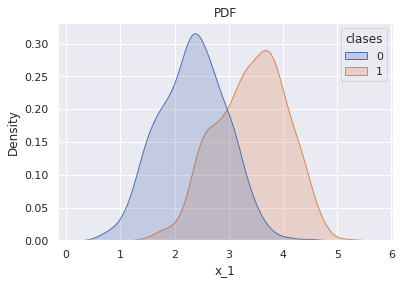

In [ ]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
 
# plotting both distibutions on the same figure
sns.kdeplot(data=df, x="x_1", hue="clases",shade=True,palette="deep").set(title='PDF')



# Clasificación y Evaluación

## KNN

Usaremos el total de datos `(X,y)` definidos más arriba en 'Base de datos F2'.

En este ejemplo `X` tiene 1200 muestras, 2 características y 2 clases. Escogeremos aleatoriamente el 80% para el training y 20% para el testing. La clasificación se hace mediante un KNN de 5 vecinos.

In [ ]:
# 0. Definición Training/Testing: (X,y)

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.2)

print('Training: muestras de clase 0: '+str(np.sum(ytrain==0)))
print('                      clase 1: '+str(np.sum(ytrain==1)))
print('                        Total: '+str(len(ytrain)))
print(' ')
print(' Testing: muestras de clase 0: '+str(np.sum(ytest==0)))
print('                      clase 1: '+str(np.sum(ytest==1)))
print('                        Total: '+str(len(ytest)))


# 1. Definición del Clasificador
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)

# 2. Entrenamiento
clf.fit(Xtrain, ytrain)

# 3. Predicción en el Testing
ypred = clf.predict(Xtest)

# 4. Accuracy
acc	 = accuracy_score(ypred,ytest)
print('Acc = '+str(acc*100))

Training: muestras de clase 0: 480
                      clase 1: 480
                        Total: 960
 
 Testing: muestras de clase 0: 120
                      clase 1: 120
                        Total: 240
Acc = 91.25


## Visualización de Matriz de Confusión

Confusion Matrix:
[[104  16]
 [  5 115]]
Accuracy = 91.25


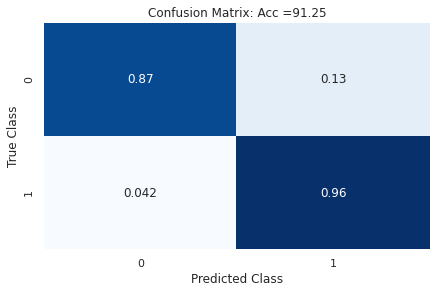

In [ ]:
print_confusion(ytest,ypred,show_heatmap=1,Cnorm=120)


## Visualización de Línea de Decisión

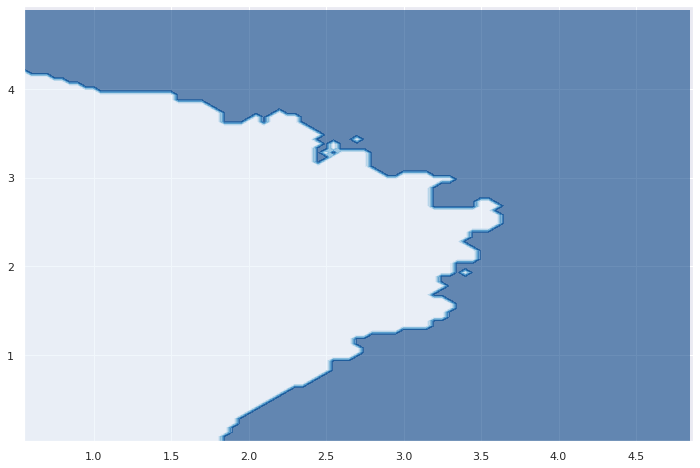

In [ ]:
plot_decision_lines(clf,Xtrain,show=1)

## Visualización de Línea de Decisión con Datos

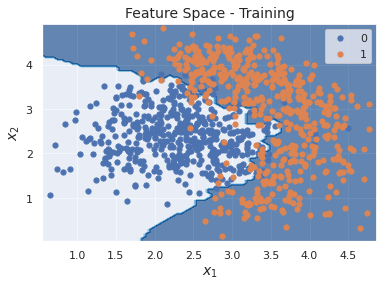

In [ ]:
plot_decision_lines(clf,Xtrain,show=0)
plot_features(Xtrain,ytrain,'Training',show=0)


## Visualización Total

Training:
Confusion Matrix:
[[451  29]
 [ 30 450]]
Accuracy = 93.85
Testing:
Confusion Matrix:
[[104  16]
 [  5 115]]
Accuracy = 91.25


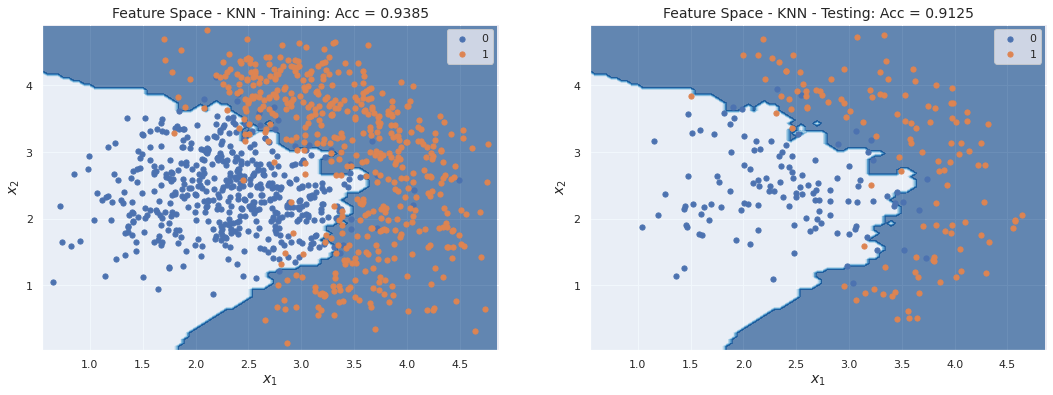

In [ ]:
# Predicción en el Ttraining (solo como referencia)
ypred_train  = clf.predict(Xtrain)

# Visualización de Matriz de Confusión y Espacios de Características
show_clf_results(clf,Xtrain,ytrain,
                 Xtest,ytest,ypred_train,ypred,'KNN')    # show performance and feature space